In [1]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
# Importing the dataset
shop_data = pd.read_csv('Online Shop data For clustering.csv')

In [3]:
# Display the first 5  rows
shop_data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
# Display the last 5 rows
shop_data.tail()

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [5]:
# Display descriptive statistics of the dataset
print("\nDataset Description:")
print(shop_data.describe())


Dataset Description:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.00

In [6]:
# Display basic information about the dataset
shop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### --------------- number of row and features

In [31]:
# Here is  the shape, number of row and features
shop_data.shape

(8950, 18)

### ---------------which columns contain null values.

In [33]:
# Checking which columns contain null values.
shop_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [34]:
# No duplicates found
shop_data.duplicated().sum()

0

### --------------- Verify that NaNs are filled

In [56]:
import numpy as np
from sklearn.impute import SimpleImputer

# Initialize the imputer with the mean strategy
numImputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Apply the imputer separately to each column
shop_data['CREDIT_LIMIT'] = numImputer.fit_transform(shop_data[['CREDIT_LIMIT']])
shop_data['MINIMUM_PAYMENTS'] = numImputer.fit_transform(shop_data[['MINIMUM_PAYMENTS']])

# Verify that NaNs are filled
print(shop_data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].isnull().sum())

CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
dtype: int64


### --------------- columns by their names or indices

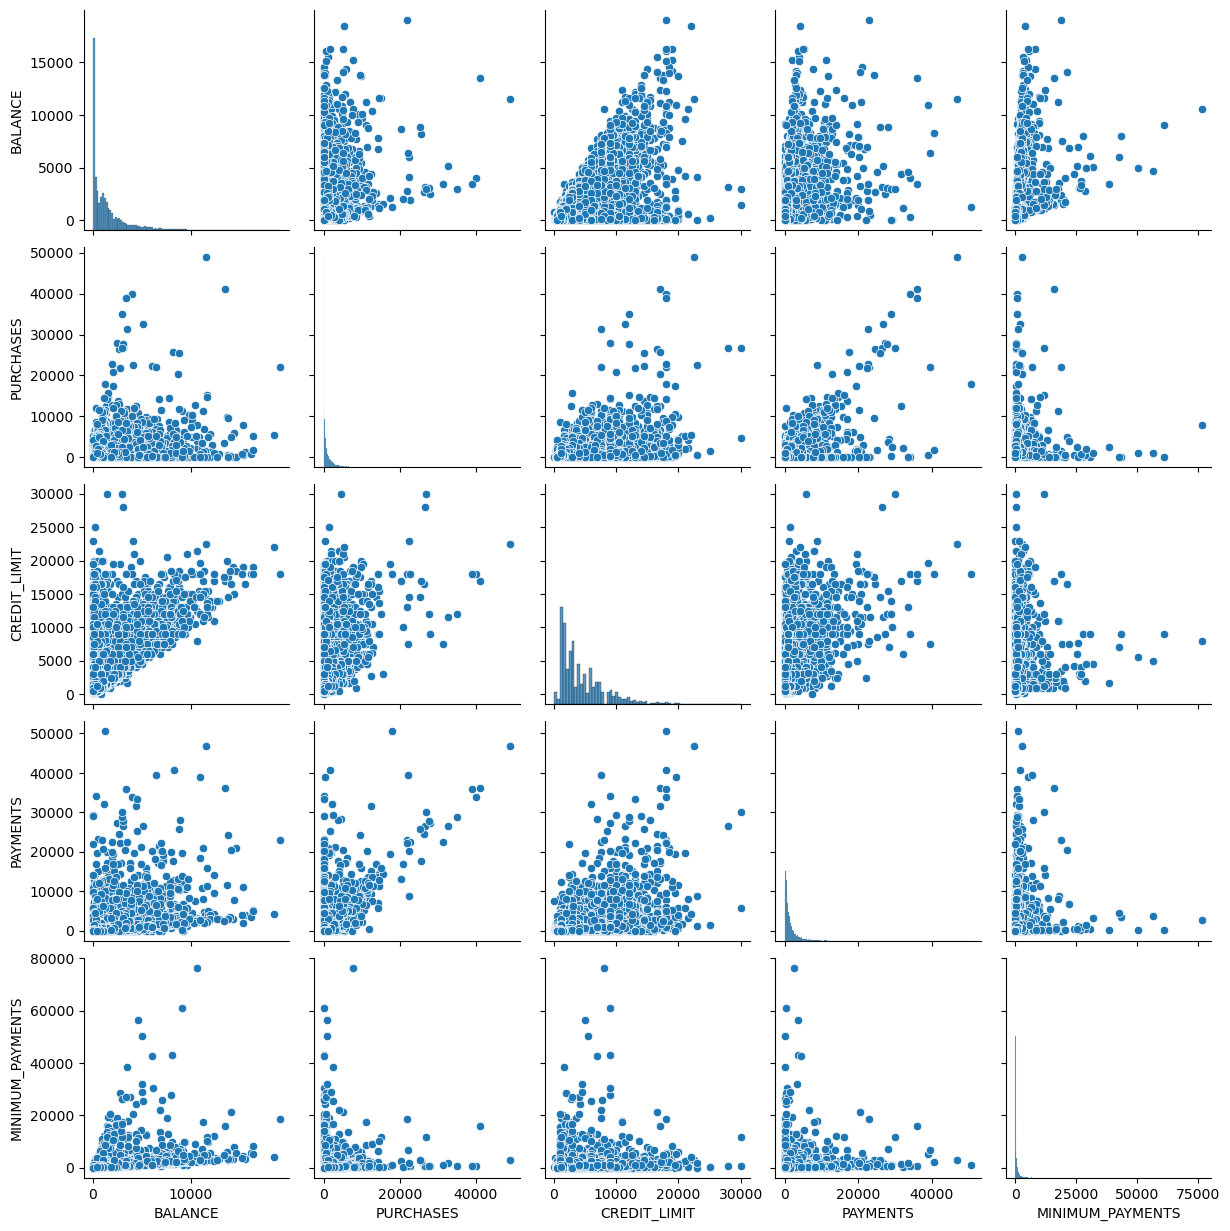

In [58]:

import seaborn as sns

# Select key columns by their names or indices
key_columns = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
#1,3,13,14,15
# Create the pairplot
sns.pairplot(shop_data[key_columns])

### --------------- key numerical features

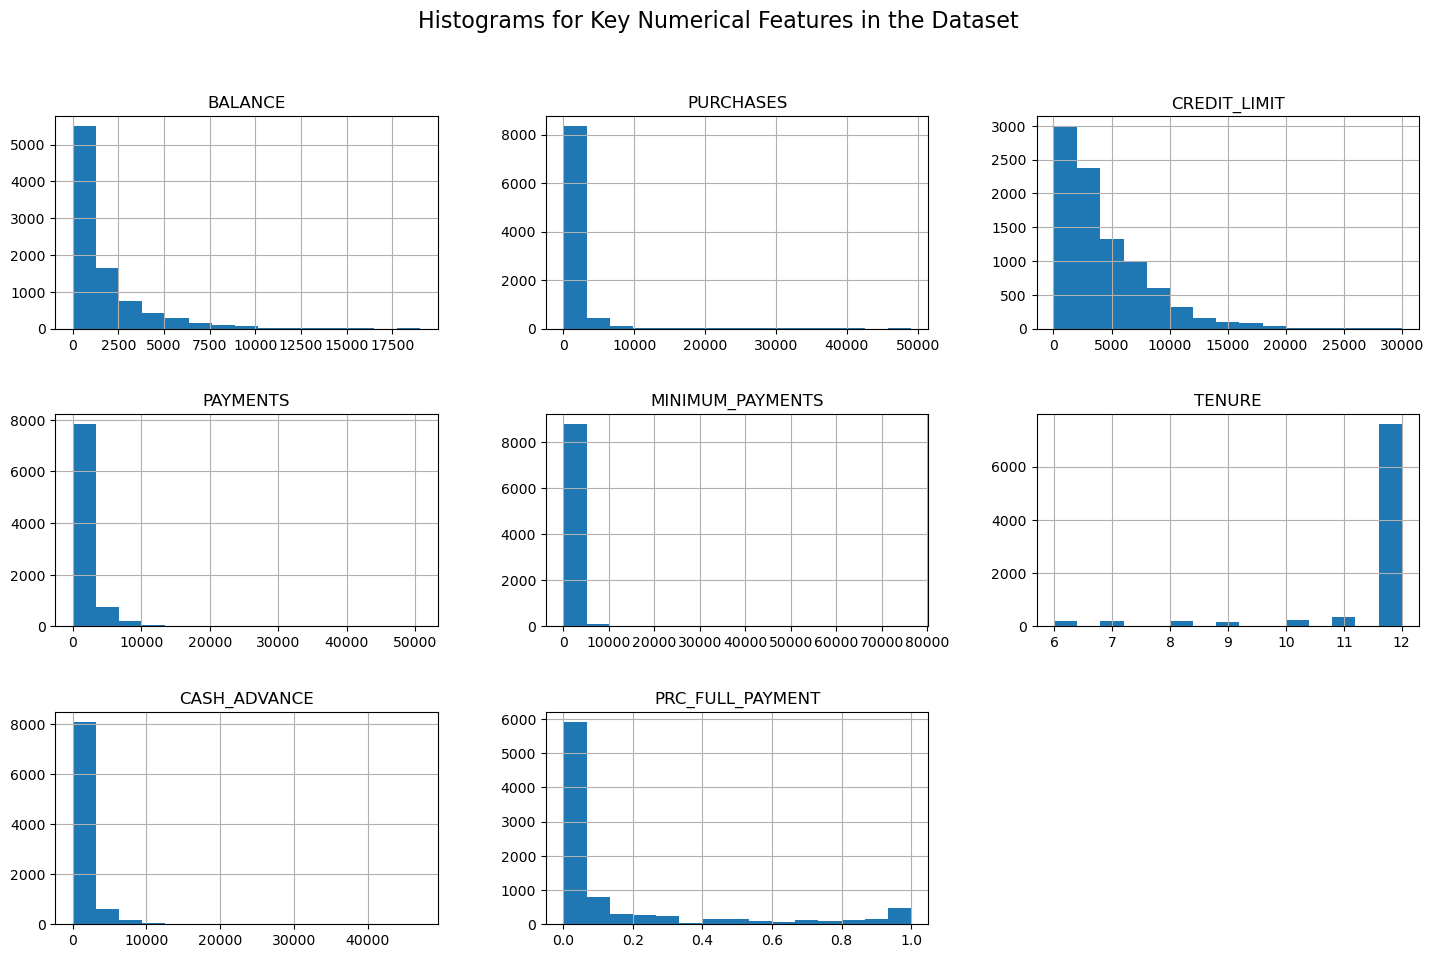

In [62]:
import matplotlib.pyplot as plt

# Define key numerical features from your dataset
numerical_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE','CASH_ADVANCE','PRC_FULL_PAYMENT']

# Plot histograms for the numerical features
shop_data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms for Key Numerical Features in the Dataset', fontsize=16)
plt.tight_layout(pad=3.0)  # Adjust layout for better spacing
plt.show()

### --------- Credit Limit vs Spending Habits

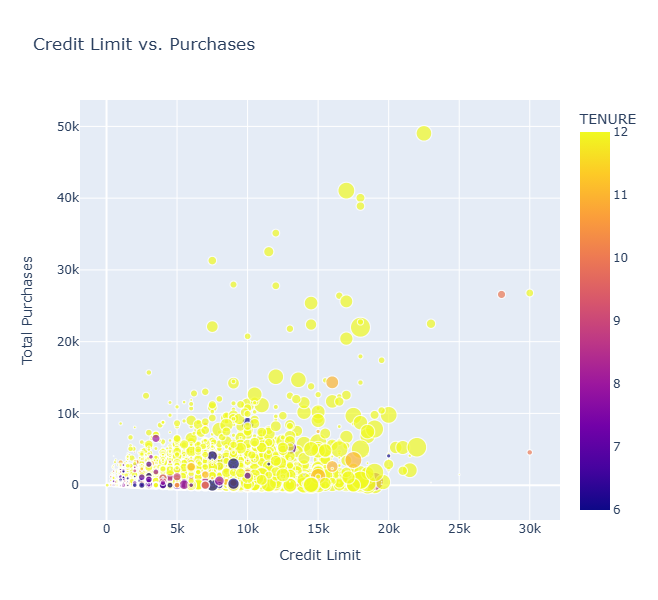

In [64]:
# Scatter plot of CREDIT_LIMIT vs PURCHASES
fig = px.scatter(
    shop_data,
    x='CREDIT_LIMIT',
    y='PURCHASES',
    title="Credit Limit vs. Purchases",
    labels={'CREDIT_LIMIT': 'Credit Limit', 'PURCHASES': 'Total Purchases'},
    color='TENURE',
    size='BALANCE',
)
fig.update_layout(width=800, height=600)
fig.show()


### ---------------Average Purchases and Cash Advances by Tenure

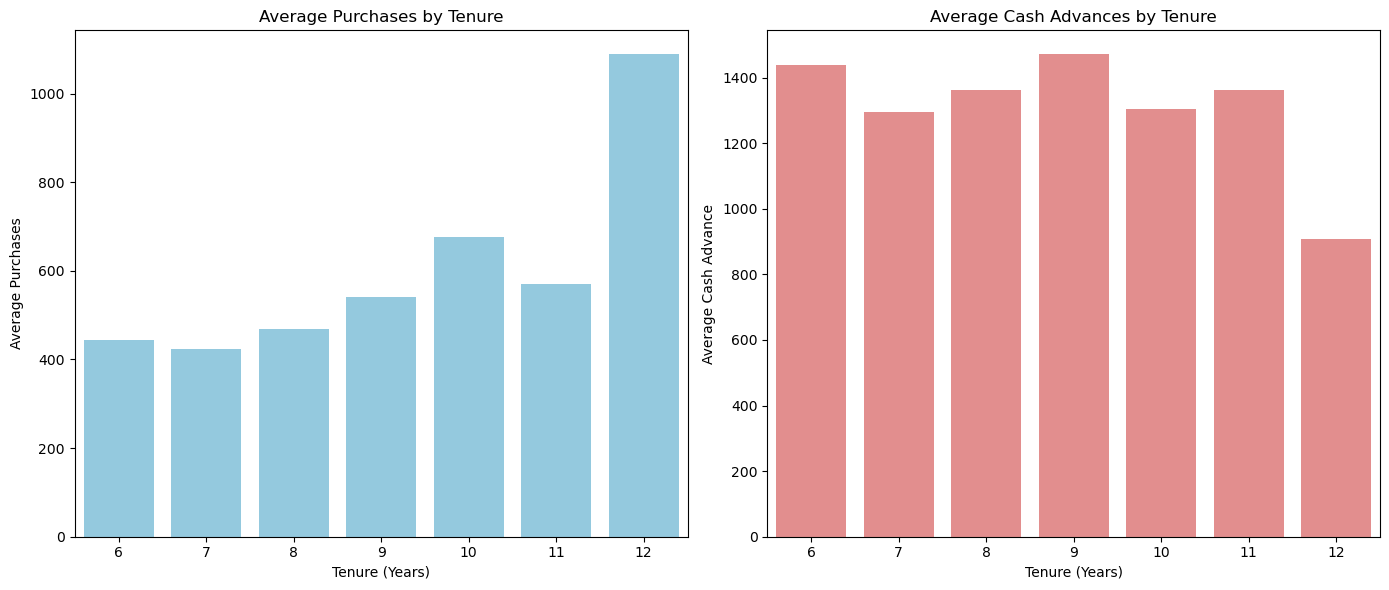

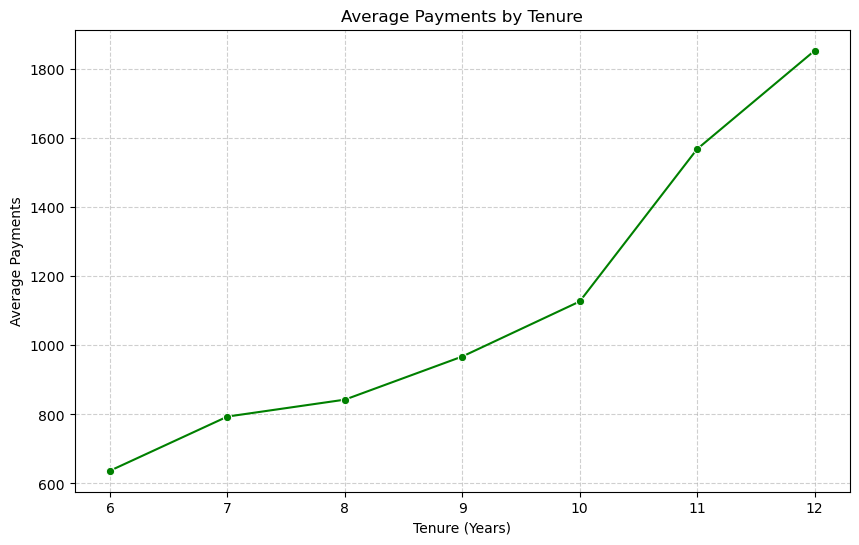

In [66]:
# 1. Bar Plot for Average Purchases and Cash Advances by Tenure
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=shop_data, x='TENURE', y='PURCHASES', estimator='mean', errorbar=None, color='skyblue')
plt.title('Average Purchases by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Purchases')

plt.subplot(1, 2, 2)
sns.barplot(data=shop_data, x='TENURE', y='CASH_ADVANCE', estimator='mean', errorbar=None, color='lightcoral')
plt.title('Average Cash Advances by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Cash Advance')

plt.tight_layout()
plt.show()

# 2. Line Plot for Average Payments over Tenure
plt.figure(figsize=(10, 6))
sns.lineplot(data=shop_data, x='TENURE', y='PAYMENTS', estimator='mean', errorbar=None, marker='o', color='green')
plt.title('Average Payments by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Average Payments')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### ----------------- Spending patterns

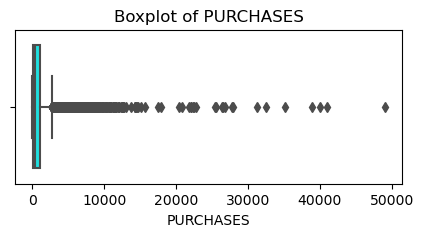

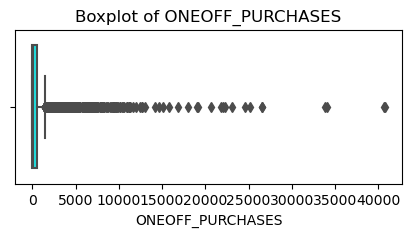

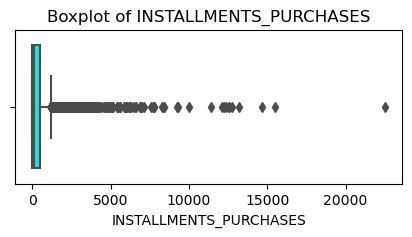

In [68]:
spending_columns = ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']

for column in spending_columns:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=shop_data[column], color='cyan')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

### ---------remove outliers using the IQR method

In [70]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from BALANCE and CASH_ADVANCE
cleaned_data = shop_data.copy()  # Create a copy to preserve the original data
cleaned_data = remove_outliers(cleaned_data, 'BALANCE')
cleaned_data = remove_outliers(cleaned_data, 'CASH_ADVANCE')

# Print the results
print(f"Original data size: {shop_data.shape}")
print(f"Cleaned data size: {cleaned_data.shape}")


Original data size: (8950, 18)
Cleaned data size: (7351, 18)


## ----------------------Cleaned data size matrix

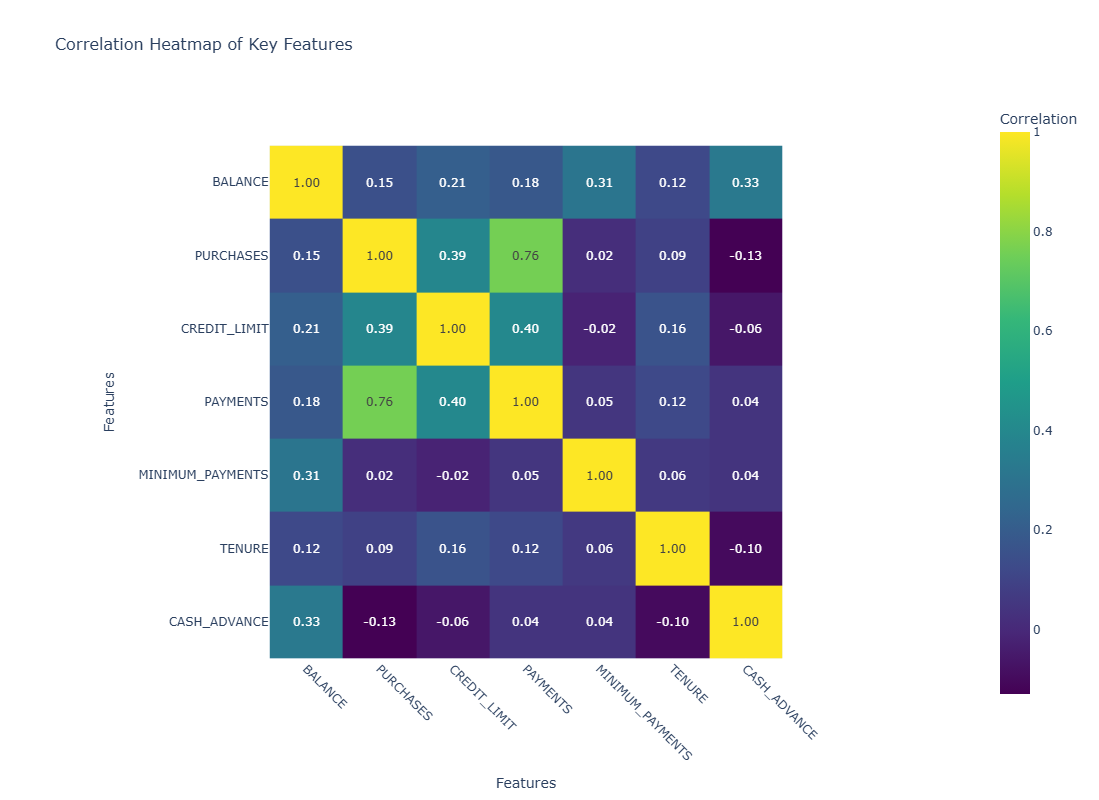

In [74]:
# Select key columns
key_columns = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE', 'CASH_ADVANCE']
key_data = cleaned_data[key_columns]  # Select specified columns

# Calculate the correlation matrix for the key columns
correlation_matrix_key = key_data.corr().round(2)

# Create a heatmap using Plotly Express
fig = px.imshow(
    correlation_matrix_key,
    text_auto='.2f',  # Format the values to two decimal places
    color_continuous_scale='viridis',
    title="Correlation Heatmap of Key Features",
    labels=dict(color="Correlation"),
)

# Customize layout for better readability
fig.update_layout(
    title_font_size=16,
    xaxis=dict(tickangle=45, title="Features"),
    yaxis=dict(title="Features"),
    width=800,
    height=800,
)

# Show the interactive heatmap
fig.show()


## ----------------------------Original data size matrix

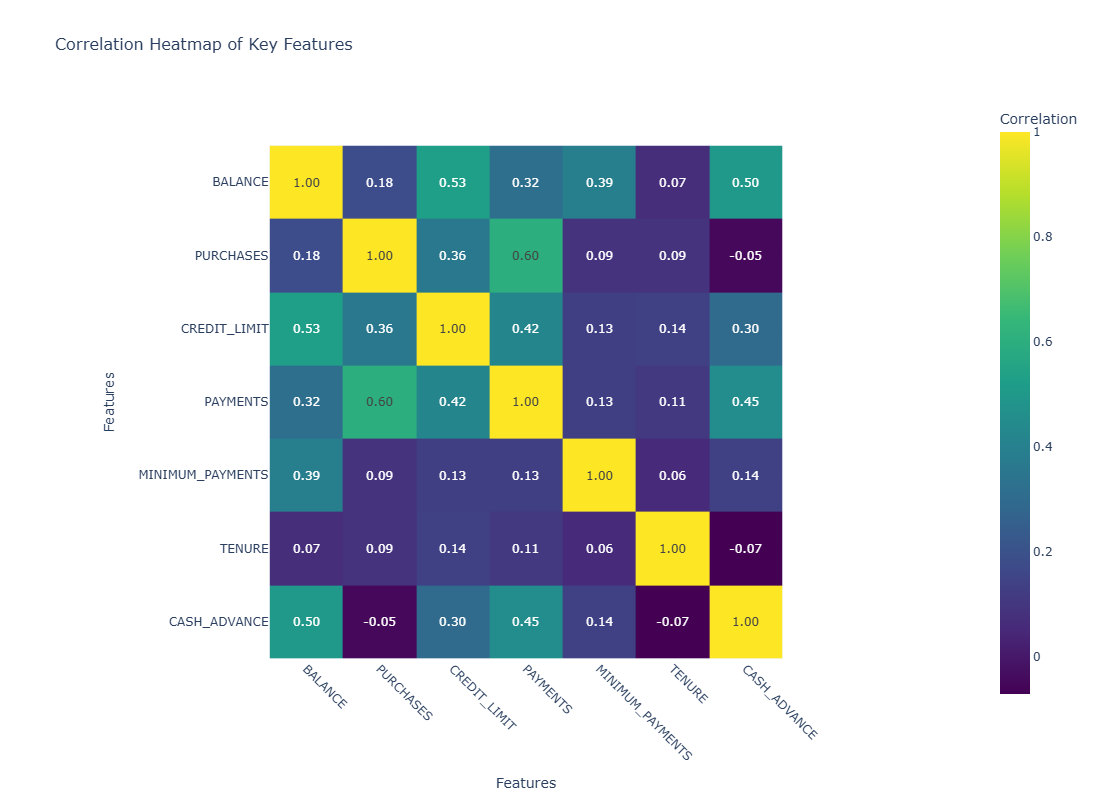

In [76]:
# Select key columns
key_columns = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE', 'CASH_ADVANCE']
key_data = shop_data[key_columns]  # Select specified columns

# Calculate the correlation matrix for the key columns
correlation_matrix_key = key_data.corr().round(2)

# Create a heatmap using Plotly Express
fig = px.imshow(
    correlation_matrix_key,
    text_auto='.2f',  # Format the values to two decimal places
    color_continuous_scale='viridis',
    title="Correlation Heatmap of Key Features",
    labels=dict(color="Correlation"),
)

# Customize layout for better readability
fig.update_layout(
    title_font_size=16,
    xaxis=dict(tickangle=45, title="Features"),
    yaxis=dict(title="Features"),
    width=800,
    height=800,
)

# Show the interactive heatmap
fig.show()


### ------------- Removing customer ID 

In [ ]:
### renamed cleeaned data to (shop_data)

In [78]:
# removing cust id
shop_data = cleaned_data.drop(columns=['CUST_ID'])

### ------------- checking for null values on cleaned data

In [80]:
# Checking which columns contain null values.
shop_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### ----------Normalize the data using StandardScaler

In [82]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
Shop_data_standard = scaler.fit_transform(shop_data)

# Display the processed dataset
Shop_data_standard

array([[-0.8298547 , -0.18381137, -0.45515355, ..., -0.28561482,
        -0.56805219,  0.34925242],
       [ 1.45267411,  0.54525189, -0.10153635, ...,  0.0063727 ,
        -0.56805219,  0.34925242],
       [ 0.68216292, -0.91287463,  0.27715549, ...,  0.14819669,
        -0.56805219,  0.34925242],
       ...,
       [-0.84613219, -0.12305811, -0.42958847, ..., -0.31979038,
         0.23091447, -4.23394517],
       [-0.85537774, -0.12305811, -0.50492719, ..., -0.33575099,
         0.23091447, -4.23394517],
       [-0.52126334, -0.79136409,  0.065461  , ..., -0.31627618,
        -0.56805219, -4.23394517]])

## Kmeans. Determine the optimal number of clusters using the elbow method

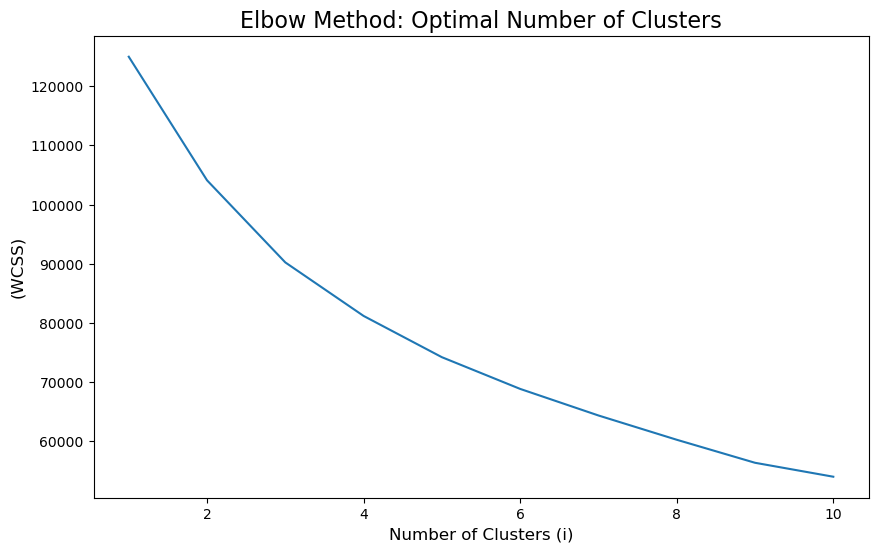

In [84]:
# Determine the optimal number of clusters using the elbow method
wcss = []  
for i in range(1, 11):  # Range of clusters to test

    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(Shop_data_standard)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method: Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters (i)', fontsize=12)
plt.ylabel('(WCSS)', fontsize=12)
#plt.grid(True)
plt.show()


### --------Reduce dimensionality using PCA

In [85]:
#Reduce dimensionality using PCA to 2 dimensions for visualization
pca = PCA(n_components=2)
shop_reduced = pca.fit_transform(Shop_data_standard)

pca.explained_variance_ratio_

array([0.29402461, 0.17213224])

In [86]:
sum(pca.explained_variance_ratio_)

0.4661568557939833

### --------Perform K-Means Clustering

In [94]:
# Performing K-Means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(shop_reduced)  # Use 2D data for plotting

### ------------Plot each cluster

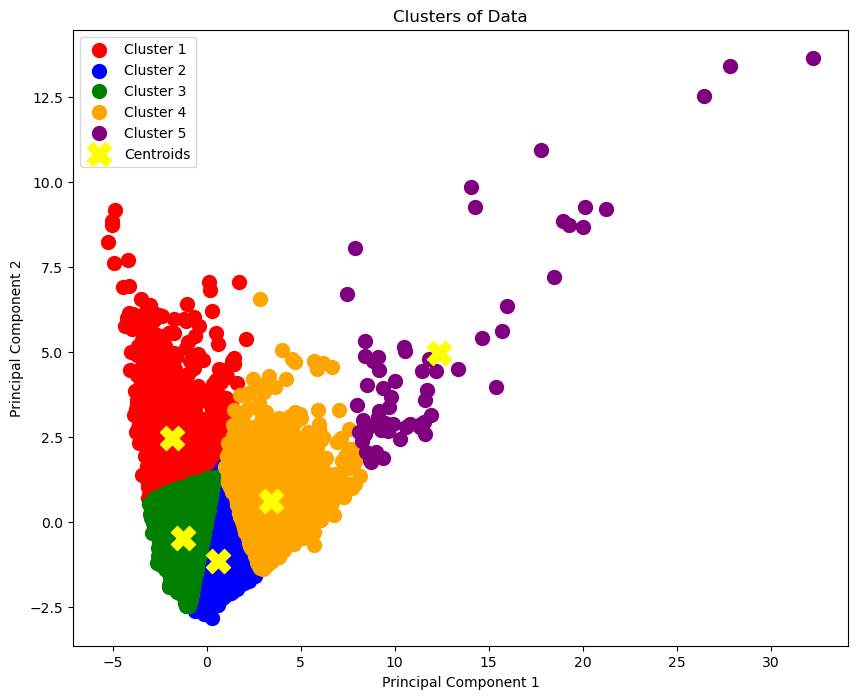

In [96]:
# Plot each cluster
plt.figure(figsize=(10, 8))

# Assign unique colors and labels for each of the 5 clusters
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(5):
    plt.scatter(shop_reduced[clusters == i, 0], shop_reduced[clusters == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='X')

# Labels and title
plt.title('Clusters of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Hierarchy

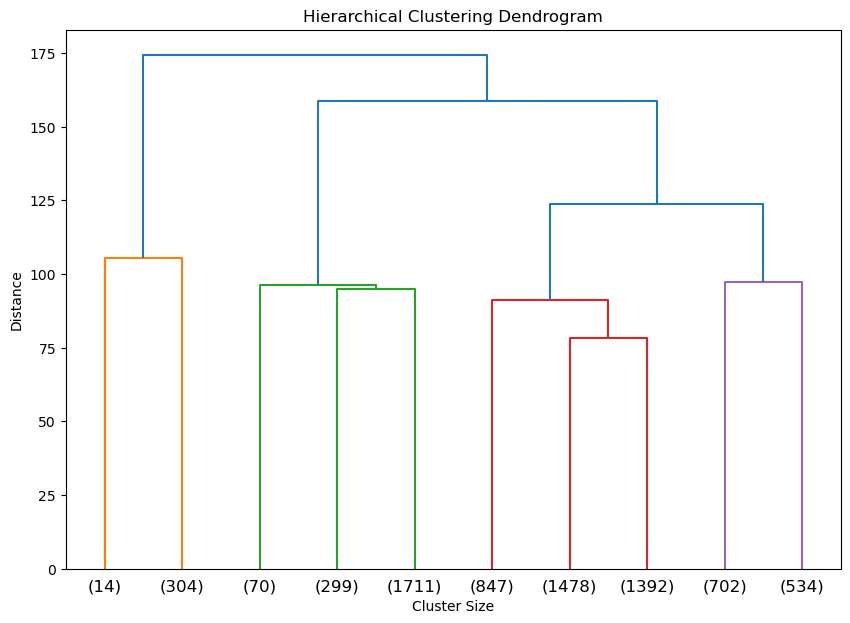

In [98]:
# Compute the linkage matrix
Z = linkage(Shop_data_standard, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


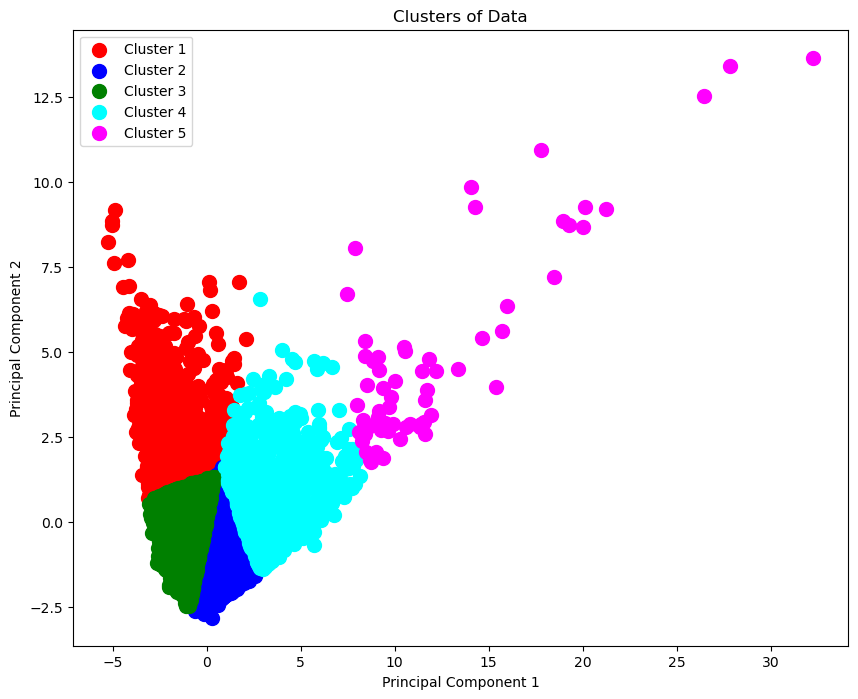

In [100]:
# Plot each cluster
plt.figure(figsize=(10, 8))

# Assign unique colors and labels for each of the 7 clusters
colors = ['red', 'blue', 'green', 'cyan', 'magenta']# if needed (, 'orange', 'purple')
for i in range(5):
    plt.scatter(shop_reduced[clusters == i, 0], shop_reduced[clusters == i, 1], 
                s=100, c=colors[i], label=f'Cluster {i+1}')


# Labels and title
plt.title('Clusters of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [105]:
score = silhouette_score(shop_reduced, clusters)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.36714868450579147


In [107]:
# Add cluster labels back to the original dataset
shop_data['Cluster_number'] = clusters
shop_data.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   
5  1809.828751           1.000000    1333.28              0.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_number  
0   201.802084        139.509787               0.0      12               2  
2   622.066742        627.284787               0.0      12               1  
3     0.000000        864.206542               0.0      12               2  
4   678.334763        244.791237               0.0      12               2  
5  1400.057770       2407.246035               0.0      12               1

In [111]:
cluster_0  = shop_data[shop_data['Cluster_number']  == 0]
cluster_0.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
26  1615.967240           1.000000     102.00            102.00   
37  4047.480828           1.000000    2380.55           1642.17   
41   784.889762           0.909091    1526.59            786.30   
43  1360.742377           1.000000       0.00              0.00   
47  3910.111237           1.000000       0.00              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
26                    0.00    244.840485             0.166667   
37                  738.38   1697.660901             0.750000   
41                  740.29   2188.419607             0.583333   
43                    0.00   1481.587093             0.000000   
47                    0.00   1980.873201             0.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
26                    0.166667                          0.000000   
37                    0.500000                          0.750000   
41                    0.416667                          0.333333   
43                    0.000000                          0.000000   
47                    0.000000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
26                0.250000                 5              2        1700.0   
37                0.333333                 7             41        5000.0   
41                0.250000                11             27        3000.0   
43                0.083333                 1              0        1500.0   
47                0.500000                 7              0        4200.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_number  
26   890.178845        971.183209          0.000000      12               0  
37  1617.894416       1541.141605          0.000000      12               0  
41  1262.309666        363.142736          0.111111      12               0  
43   378.294227        321.354137          0.000000      12               0  
47     0.000000        864.206542          0.000000      12               0

In [113]:
cluster_1  = shop_data[shop_data['Cluster_number']  == 1]
cluster_1.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2   2495.148862           1.000000     773.17            773.17   
5   1809.828751           1.000000    1333.28              0.00   
7   1823.652743           1.000000     436.20              0.00   
9    152.225975           0.545455    1281.60           1281.60   
10  1293.124939           1.000000     920.12              0.00   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                     0.00           0.0             1.000000   
5                  1333.28           0.0             0.666667   
7                   436.20           0.0             1.000000   
9                     0.00           0.0             0.166667   
10                  920.12           0.0             1.000000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                     1.000000                          0.000000   
5                     0.000000                          0.583333   
7                     0.000000                          1.000000   
9                     0.166667                          0.000000   
10                    0.000000                          1.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                      0.0                 0             12        7500.0   
5                      0.0                 0              8        1800.0   
7                      0.0                 0             12        2300.0   
9                      0.0                 0              3       11000.0   
10                     0.0                 0             12        1200.0   

       PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_number  
2    622.066742        627.284787               0.0      12               1  
5   1400.057770       2407.246035               0.0      12               1  
7    679.065082        532.033990               0.0      12               1  
9   1164.770591        100.302262               0.0      12               1  
10  1083.301007       2172.697765               0.0      12               1

In [115]:
cluster_2  = shop_data[shop_data['Cluster_number']  == 2]
cluster_2.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     40.900749           0.818182      95.40              0.00   
3   1666.670542           0.636364    1499.00           1499.00   
4    817.714335           1.000000      16.00             16.00   
8   1014.926473           1.000000     861.49            661.49   
11   630.794744           0.818182    1492.18           1492.18   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     95.4      0.000000             0.166667   
3                      0.0    205.788017             0.083333   
4                      0.0      0.000000             0.083333   
8                    200.0      0.000000             0.333333   
11                     0.0      0.000000             0.250000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.000000                          0.083333   
3                     0.083333                          0.000000   
4                     0.083333                          0.000000   
8                     0.083333                          0.250000   
11                    0.250000                          0.000000   

    CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                 0.000000                 0              2        1000.0   
3                 0.083333                 1              1        7500.0   
4                 0.000000                 0              1        1200.0   
8                 0.000000                 0              5        7000.0   
11                0.000000                 0              6        2000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster_number  
0   201.802084        139.509787               0.0      12               2  
3     0.000000        864.206542               0.0      12               2  
4   678.334763        244.791237               0.0      12               2  
8   688.278568        311.963409               0.0      12               2  
11  705.618627        155.549069               0.0      12               2

In [117]:
cluster_0.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  1351.000000        1351.000000  1351.000000       1351.000000   
mean   1900.070684           0.956570   293.097868        194.176454   
std    1222.089097           0.120615   535.444856        429.424377   
min      10.268192           0.090909     0.000000          0.000000   
25%     975.348142           1.000000     0.000000          0.000000   
50%    1602.425383           1.000000     0.000000          0.000000   
75%    2709.034206           1.000000   379.175000        190.500000   
max    4940.113918           1.000000  4900.000000       4900.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1351.000000   1351.000000          1351.000000   
mean                98.947113   1124.979247             0.215937   
std                256.104412    597.418526             0.321379   
min                  0.000000      0.000000             0.000000   
25%                  0.000000    626.055911             0.000000   
50%                  0.000000   1135.028534             0.000000   
75%                  0.000000   1612.463966             0.333333   
max               2467.100000   2215.257509             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1351.000000                       1351.000000   
mean                     0.106903                          0.127849   
std                      0.197890                          0.270869   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.154762                          0.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1351.000000       1351.000000    1351.000000   1351.000000   
mean                 0.313317          6.532939       4.925981   3455.008636   
std                  0.176795          5.057615       9.250850   2411.832030   
min                  0.000000          0.000000       0.000000    200.000000   
25%                  0.166667          3.000000       0.000000   1700.000000   
50%                  0.272727          5.000000       0.000000   3000.000000   
75%                  0.416667          8.000000       6.000000   4500.000000   
max                  1.500000         48.000000      63.000000  17000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count   1351.000000       1351.000000       1351.000000  1351.000000   
mean    1225.679312       1087.216214          0.024000    11.416728   
std     1341.572829       2772.926274          0.083526     1.469790   
min        0.000000         41.385496          0.000000     6.000000   
25%      467.725045        316.498402          0.000000    12.000000   
50%      805.924742        564.587643          0.000000    12.000000   
75%     1437.157134        974.794433          0.000000    12.000000   
max    14176.748670      56370.041170          1.000000    12.000000   

       Cluster_number  
count          1351.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0

In [119]:
cluster_1.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  2685.000000        2685.000000  2685.000000       2685.000000   
mean    471.290315           0.863401   822.287486        346.858488   
std     713.541215           0.231381   621.621097        558.871681   
min       0.000000           0.000000     8.400000          0.000000   
25%      40.607669           0.818182   350.000000          0.000000   
50%     124.739834           1.000000   642.330000          0.000000   
75%     645.299519           1.000000  1147.230000        537.360000   
max    4751.340645           1.000000  3950.000000       3950.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             2685.000000   2685.000000          2685.000000   
mean               475.756212     23.952318             0.795420   
std                467.952747    122.238209             0.230786   
min                  0.000000      0.000000             0.083333   
25%                154.000000      0.000000             0.636364   
50%                353.900000      0.000000             0.888889   
75%                633.240000      0.000000             1.000000   
max               3200.000000   1567.042271             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 2685.000000                       2685.000000   
mean                     0.202491                          0.628648   
std                      0.294184                          0.351635   
min                      0.000000                          0.000000   
25%                      0.000000                          0.416667   
50%                      0.000000                          0.750000   
75%                      0.333333                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             2685.000000       2685.000000     2685.00000   2685.000000   
mean                 0.008481          0.125512       15.37095   3779.833738   
std                  0.034630          0.546191        9.92300   3038.139019   
min                  0.000000          0.000000        0.00000    300.000000   
25%                  0.000000          0.000000        9.00000   1500.000000   
50%                  0.000000          0.000000       12.00000   3000.000000   
75%                  0.000000          0.000000       19.00000   5000.000000   
max                  0.333333          5.000000      111.00000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count   2685.000000       2685.000000       2685.000000  2685.000000   
mean     954.590494        407.231249          0.307210    11.577281   
std     1002.455515        905.898141          0.365613     1.268560   
min        0.000000          0.019163          0.000000     6.000000   
25%      354.506682        137.173328          0.000000    12.000000   
50%      686.976557        174.766771          0.111111    12.000000   
75%     1260.163840        302.481716          0.600000    12.000000   
max    16842.391870      15914.721540          1.000000    12.000000   

       Cluster_number  
count          2685.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0

In [121]:
cluster_2.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count  2346.000000        2346.000000  2346.000000       2346.000000   
mean    711.830432           0.765930   239.829220        173.596219   
std     777.033479           0.319628   338.537504        325.961804   
min       0.000000           0.000000     0.000000          0.000000   
25%      42.541631           0.545455     0.000000          0.000000   
50%     455.811514           1.000000   107.160000          0.000000   
75%    1142.668490           1.000000   329.737500        199.720000   
max    4587.062248           1.000000  2900.000000       2900.000000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             2346.000000   2346.000000          2346.000000   
mean                66.695230    210.062021             0.207091   
std                139.086039    363.286516             0.226501   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.000000   
50%                  0.000000      0.000000             0.133929   
75%                 77.907500    270.743973             0.333333   
max               1695.000000   2200.173071             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 2346.000000                       2346.000000   
mean                     0.083224                          0.120477   
std                      0.122597                          0.209974   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.100000                          0.166667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             2346.000000       2346.000000    2346.000000   2346.000000   
mean                 0.060562          0.913043       3.242967   2715.557452   
std                  0.077658          1.285355       4.117647   2252.714188   
min                  0.000000          0.000000       0.000000    150.000000   
25%                  0.000000          0.000000       0.000000   1200.000000   
50%                  0.000000          0.000000       2.000000   1800.000000   
75%                  0.083333          1.000000       5.000000   3000.000000   
max                  0.428571          8.000000      43.000000  19500.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  \
count   2346.000000       2346.000000       2346.000000  2346.000000   
mean     648.052191        526.294821          0.051431    11.417732   
std      805.390166       1223.740361          0.160294     1.450626   
min        0.000000          0.037744          0.000000     6.000000   
25%      198.044266        139.682107          0.000000    12.000000   
50%      407.457730        254.295748          0.000000    12.000000   
75%      748.591804        547.350178          0.000000    12.000000   
max    10893.778440      20316.096310          1.000000    12.000000   

       Cluster_number  
count          2346.0  
mean              2.0  
std               0.0  
min               2.0  
25%               2.0  
50%               2.0  
75%               2.0  
max               2.0

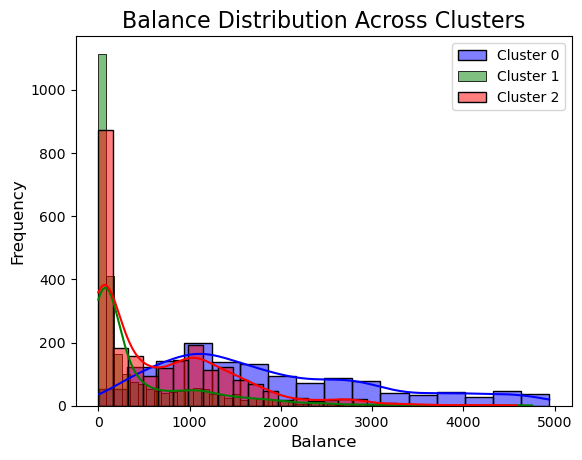

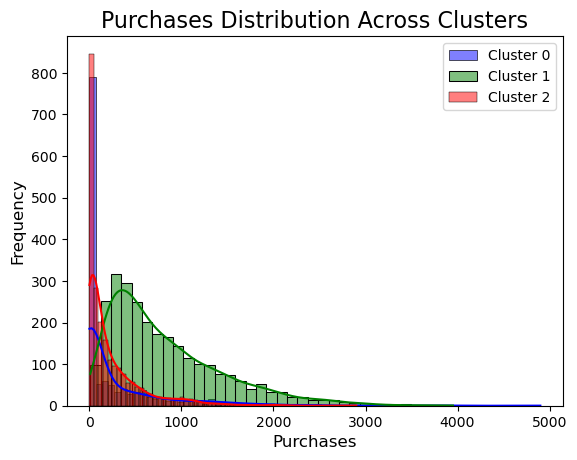

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'BALANCE' for each cluster
sns.histplot(cluster_0['BALANCE'], color='blue', kde=True, label='Cluster 0')
sns.histplot(cluster_1['BALANCE'], color='green', kde=True, label='Cluster 1')
sns.histplot(cluster_2['BALANCE'], color='red', kde=True, label='Cluster 2')

plt.title('Balance Distribution Across Clusters', fontsize=16)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

# Repeat for other key features (example: 'PURCHASES')
sns.histplot(cluster_0['PURCHASES'], color='blue', kde=True, label='Cluster 0')
sns.histplot(cluster_1['PURCHASES'], color='green', kde=True, label='Cluster 1')
sns.histplot(cluster_2['PURCHASES'], color='red', kde=True, label='Cluster 2')

plt.title('Purchases Distribution Across Clusters', fontsize=16)
plt.xlabel('Purchases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


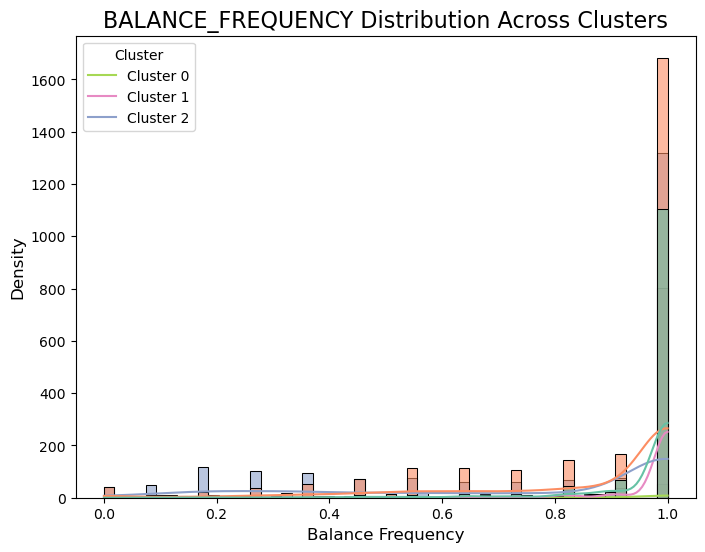

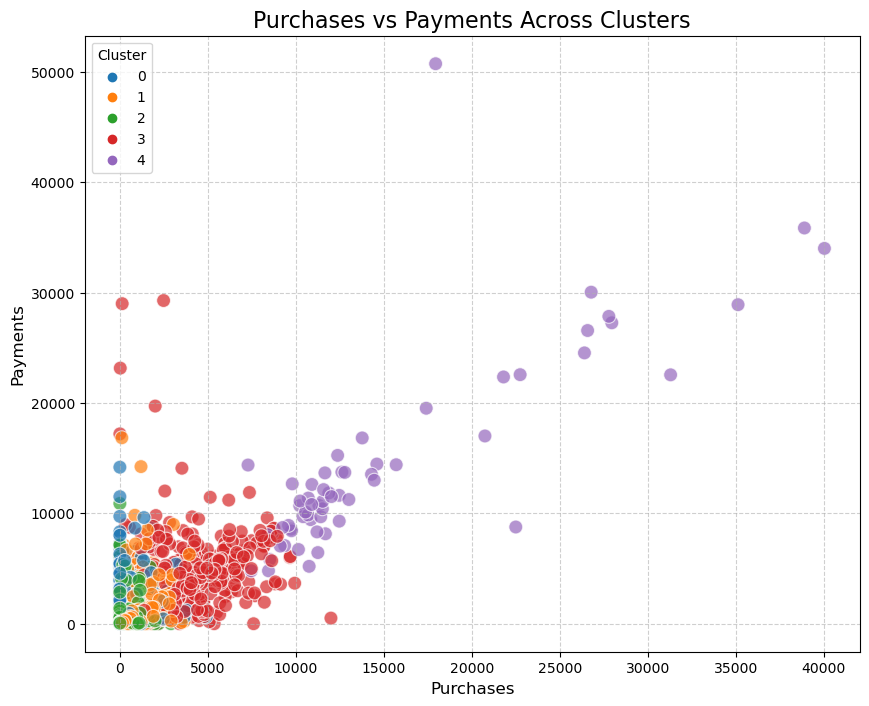

In [125]:
# Additional analysis and visualizations for cluster-specific insights

# 1. Distribution of BALANCE_FREQUENCY across clusters
plt.figure(figsize=(8, 6))
sns.histplot(data=shop_data, x='BALANCE_FREQUENCY', hue='Cluster_number', kde=True, palette='Set2', alpha=0.6)
plt.title('BALANCE_FREQUENCY Distribution Across Clusters', fontsize=16)
plt.xlabel('Balance Frequency', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Cluster', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.show()

# 2. Scatter plot of PURCHASES vs PAYMENTS to identify patterns across clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=shop_data,
    x='PURCHASES', 
    y='PAYMENTS',
    hue='Cluster_number',
    palette='tab10',
    s=100,
    alpha=0.7
)
plt.title('Purchases vs Payments Across Clusters', fontsize=16)
plt.xlabel('Purchases', fontsize=12)
plt.ylabel('Payments', fontsize=12)
plt.legend(title='Cluster', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
